Mounted at /content/drive


In [1]:
from google.colab import files
uploaded = files.upload()


Saving text.txt to text.txt
Saving 11.png to 11.png


In [6]:
import pandas as pd

df = pd.read_csv("text.txt", sep="\t")

# Filter only polygon points (type == 'T')
poly = df[df['type'] == 'T']

min_lat = poly['latitude'].min()
max_lat = poly['latitude'].max()
min_lon = poly['longitude'].min()
max_lon = poly['longitude'].max()

min_lat, max_lat, min_lon, max_lon


('33.745361742', '33.747184958', '73.132405892', '73.136289478')

In [7]:
!apt-get install -y gdal-bin
!pip install rasterio


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gdal-bin is already the newest version (3.8.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [8]:
img = "11.png"  # your screenshot name

!gdal_translate -of GTiff -a_srs EPSG:4326 \
  -a_ullr {min_lon} {max_lat} {max_lon} {min_lat} \
  {img} qau_georef.tif


Input file size is 1442, 839
0...10...20...30...40...50...60...70...80...90...100 - done.


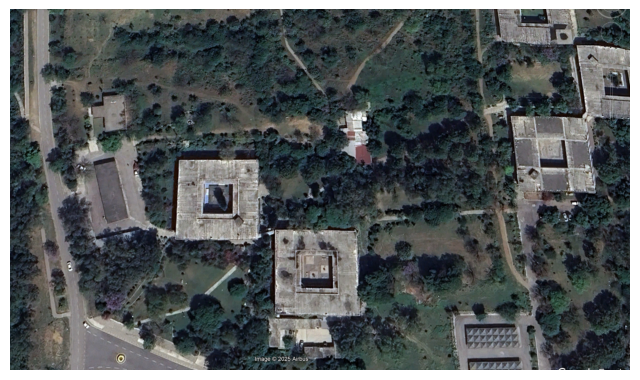

In [9]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open("qau_georef.tif") as src:
    img = src.read()
    plt.figure(figsize=(8,8))
    plt.imshow(img.transpose(1,2,0))
    plt.axis('off')


In [10]:
import os

# Create a clean output folder
output_dir = "/content/output_qau"
tiles_dir = "/content/output_qau/tiles"

os.makedirs(output_dir, exist_ok=True)
os.makedirs(tiles_dir, exist_ok=True)

print("Folders created:")
print(output_dir)
print(tiles_dir)


Folders created:
/content/output_qau
/content/output_qau/tiles


In [11]:
img = "11.png"

output_file = "/content/output_qau/qau_georef.tif"

!gdal_translate -of GTiff -a_srs EPSG:4326 \
  -a_ullr {min_lon} {max_lat} {max_lon} {min_lat} \
  {img} {output_file}


Input file size is 1442, 839
0...10...20...30...40...50...60...70...80...90...100 - done.


In [12]:
!gdal_retile.py -ps 256 256 -targetDir /content/output_qau/tiles /content/output_qau/qau_georef.tif


0...10...20...30...40...50...60...70...80...90...100 - done.


In [13]:
import os
print(os.listdir("/content/output_qau"))
print("Tiles:", os.listdir("/content/output_qau/tiles")[:10])  # show first 10 tiles


['tiles', 'qau_georef.tif']
Tiles: ['qau_georef_1_1.tif', 'qau_georef_1_4.tif', 'qau_georef_2_3.tif', 'qau_georef_1_6.tif', 'qau_georef_3_5.tif', 'qau_georef_2_4.tif', 'qau_georef_4_1.tif', 'qau_georef_2_6.tif', 'qau_georef_4_6.tif', 'qau_georef_2_1.tif']


In [14]:
from google.colab import files
files.download("/content/output_qau/qau_georef.tif")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
!zip -r /content/output_qau_tiles.zip /content/output_qau
from google.colab import files
files.download("/content/output_qau_tiles.zip")


  adding: content/output_qau/ (stored 0%)
  adding: content/output_qau/tiles/ (stored 0%)
  adding: content/output_qau/tiles/qau_georef_1_1.tif (deflated 34%)
  adding: content/output_qau/tiles/qau_georef_1_4.tif (deflated 37%)
  adding: content/output_qau/tiles/qau_georef_2_3.tif (deflated 31%)
  adding: content/output_qau/tiles/qau_georef_1_6.tif (deflated 29%)
  adding: content/output_qau/tiles/qau_georef_3_5.tif (deflated 32%)
  adding: content/output_qau/tiles/qau_georef_2_4.tif (deflated 34%)
  adding: content/output_qau/tiles/qau_georef_4_1.tif (deflated 37%)
  adding: content/output_qau/tiles/qau_georef_2_6.tif (deflated 28%)
  adding: content/output_qau/tiles/qau_georef_4_6.tif (deflated 34%)
  adding: content/output_qau/tiles/qau_georef_2_1.tif (deflated 31%)
  adding: content/output_qau/tiles/qau_georef_2_5.tif (deflated 29%)
  adding: content/output_qau/tiles/qau_georef_4_5.tif (deflated 33%)
  adding: content/output_qau/tiles/qau_georef_4_2.tif (deflated 32%)
  adding: con

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>